<div style="background-color: blue; padding: 20px; text-align: center; border-radius: 10px;">
    <h1 style="color: beige; font-weight: bold;">
        &#8226;&#8226;
        <span style="color: beige;"> Build a predictive maintenance model for a delivery company </span>
        &#8226;&#8226;
    </h1>
</div>

<span style="color: beige;"> suan burda lazim degil Classification</span>

In diesem Projekt arbeiten wir mit einem unausgewogenen Datensatz, was in Machine Learning eine unerwünschte Situation darstellt. Bei solchen Datensätzen, bei denen eine Klasse signifikant häufiger vertreten ist als die andere, wird das Modelltraining erschwert und die Performance verschlechtert sich, besonders für die weniger vertretene Klasse. Um dieses Problem zu lösen, werden wir Techniken wie SMOTE einsetzen, um den Datensatz auszugleichen.

Das Ziel dieses Projekts ist es, mit dem Klassifikationsansatz verschiedene Algorithmen zu entwickeln und anzuwenden. Die Herausforderung besteht darin, geeignete Techniken zu verwenden, um mit den unausgewogenen Daten umzugehen und ein Modell zu erstellen, das die weniger vertretene Klasse korrekt erkennt und vorhersagt, um so die Modellleistung zu optimieren
________
Bu projede, bir imbalanced (dengesiz) veri seti ile çalışacağız, bu da makine öğreniminde istenmeyen bir durumdur. Bir sınıfın, diğerine göre önemli ölçüde daha fazla temsil edildiği dengesiz veri setleri, model eğitimi sürecini zorlaştırır ve özellikle daha az temsil edilen sınıf için performans düşüşüne yol açar. Bu sorunu çözmek için, veri setini dengelemek amacıyla SMOTE (Synthetic Minority Over-sampling Technique) gibi teknikleri kullanacağız.

Bu projenin amacı, classification (sınıflandırma) yaklaşımını kullanarak çeşitli algoritmalar geliştirmek ve uygulamaktır. Zorluk, dengesiz verilerle başa çıkmak için uygun teknikler kullanarak, daha az temsil edilen sınıfı doğru şekilde tanıyıp tahmin eden bir model geliştirmekte ve model performansını iyileştirmektedir
________

In this project, we will work with an imbalanced dataset, which represents an undesirable situation in machine learning. Datasets where one class is significantly more represented than the other make model training challenging and result in poorer performance, especially for the less represented class. To address this issue, we will apply techniques such as SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset.

The goal of this project is to work with a classification approach, developing and applying various algorithms. The challenge is to use appropriate techniques to handle the imbalanced data and create a model that correctly identifies and predicts the less represented class, thereby optimizing the model's performance

**Data Dictionary**

| **Column Name**   | **Description**                                                                  | **Turkish Translation**           |
|-------------------|----------------------------------------------------------------------------------|-----------------------------------|
| date              | The date the data was recorded.                                                  | Verilerin kaydedildiği tarih      |
| device            | The unique identifier for the device.                                            | Cihazın benzersiz kimliği         |
| failure           | Indicates if a failure occurred (0 = No Failure, 1 = Failure).                   | Hata olup olmadığını belirtir (0 = Hata Yok, 1 = Hata). |
| attribute1        | A numerical attribute containing specific device information.                    | Cihaza ait belirli bir sayısal özellik |
| attribute2        | Another numerical attribute, potentially describing performance.                  | Performansı gösterebilecek bir başka sayısal özellik |
| attribute3        | Additional device information in numerical form.                                 | Sayısal biçimde ek cihaz bilgisi  |
| attribute4        | An attribute with numerical values representing specific features or activities. | Belirli özellikleri veya aktiviteleri gösteren bir sayısal değer |
| attribute5        | A numerical attribute, possibly representing cyclic or time-based data.         | Muhtemelen döngüsel veya zamana dayalı bir özellik |
| attribute6        | A numerical attribute representing a specific condition or measurement of the device. | Cihazın belirli bir durumunu veya ölçümünü gösteren sayısal değer |
| attribute7        | Another numerical attribute containing device measurement data.                 | Cihaza ait ölçüm verilerini içeren bir başka sayısal özellik |



<img src='https://device-insight.com/wp-content/uploads/2018/03/Predictive-Maintenance-e1644243465650.jpg'>
<a href='https://classroom.google.com/c/NzIwMjcyMjkxMjgy/a/NzIwMjcyMjkxNDQ4/details' target=_blank>
Click here for the dataset </a>

**Import libary**

In [2]:
import pandas as pd
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",None)
pd.set_option("display.width", None)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('failure.csv')

**EDA - Exploratory Data Analysis**

In [4]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [5]:
df.shape

(124494, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [7]:
df.isnull().sum()

,0
date,0
device,0
failure,0
attribute1,0
attribute2,0
attribute3,0
attribute4,0
attribute5,0
attribute6,0
attribute7,0


In [8]:
df.describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223868e+08,159.484762,9.940455,1.741120,14.222693,260172.858025,0.292528,0.292528,12.451524
std,0.029167,7.045960e+07,2179.657730,185.747321,22.908507,15.943021,99151.009852,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.127675e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227957e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833084e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [9]:
df.corr(numeric_only=True)

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
failure,1.000000,0.001984,0.052902,-0.000948,0.067398,0.002270,-0.000550,0.119055,0.119055,0.001622
attribute1,0.001984,1.000000,-0.004248,0.003702,0.001837,-0.003370,-0.001516,0.000151,0.000151,0.001122
attribute2,0.052902,-0.004248,1.000000,-0.002617,0.146593,-0.013999,-0.026350,0.141367,0.141367,-0.002736
attribute3,-0.000948,0.003702,-0.002617,1.000000,0.097452,-0.006696,0.009027,-0.001884,-0.001884,0.532366
attribute4,0.067398,0.001837,0.146593,0.097452,1.000000,-0.009773,0.024870,0.045631,0.045631,0.036069
attribute5,0.002270,-0.003370,-0.013999,-0.006696,-0.009773,1.000000,-0.017051,-0.009384,-0.009384,0.005949
attribute6,-0.000550,-0.001516,-0.026350,0.009027,0.024870,-0.017051,1.000000,-0.012207,-0.012207,0.021152
attribute7,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute8,0.119055,0.000151,0.141367,-0.001884,0.045631,-0.009384,-0.012207,1.000000,1.000000,0.006861
attribute9,0.001622,0.001122,-0.002736,0.532366,0.036069,0.005949,0.021152,0.006861,0.006861,1.000000


**Data Visualization**

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

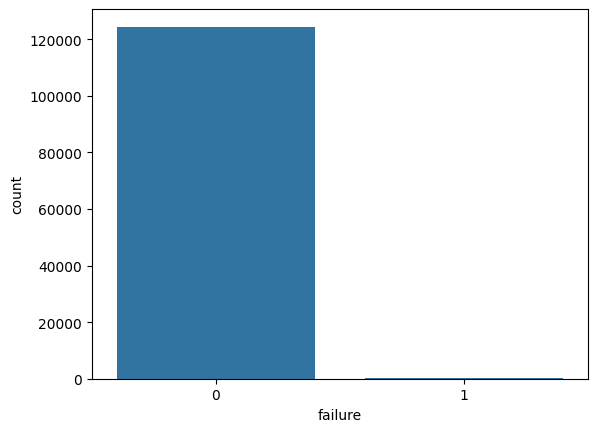

In [11]:
# imbalanced data
sns.countplot(x=df['failure']);

**Data Preparation**

In [12]:
# Remove columns
df.drop(columns=['date'], inplace=True)

In [13]:
# Handling Missing Values = NO Missing Values In This Project

In [14]:
# Remove characters and extract letters
df['device'] = df['device'].str.replace('[a-zA-Z]', '', regex=True)

In [15]:
df.head()

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,101085,0,215630672,56,0,52,6,407438,0,0,7
1,10166,0,61370680,0,3,0,6,403174,0,0,0
2,1016,0,173295968,0,0,0,12,237394,0,0,0
3,1010,0,79694024,0,0,0,6,410186,0,0,0
4,1012,0,135970480,0,0,0,15,313173,0,0,3


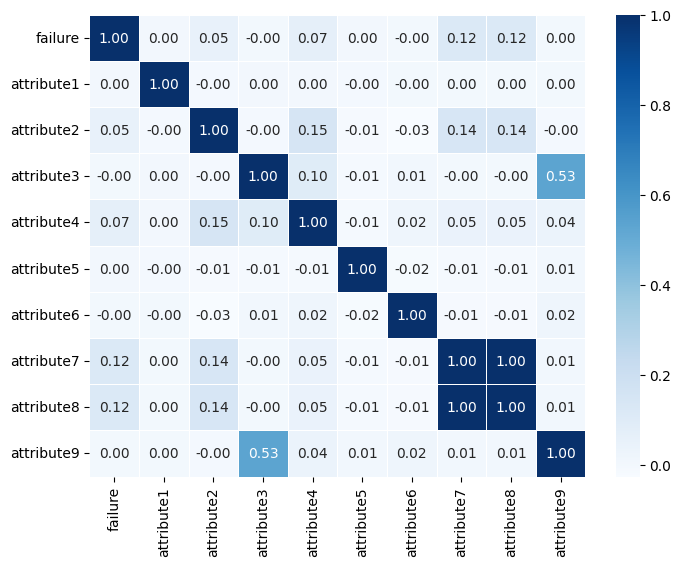

In [16]:
plt.figure(figsize=(8, 6))  # Adjust the figure size for better readability
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f', linewidths=0.5);

**Feature Engineering**

In [17]:
x = df.drop(['failure'], axis=1)
y = df['failure']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

**Modelling**

In [20]:
from sklearn.naive_bayes import GaussianNB

In [21]:
g=GaussianNB()

In [22]:
g.fit(x_train,y_train)

GaussianNB()

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [24]:
gtahmin=g.predict(x_test)

In [25]:
accuracy_score(gtahmin,y_test)

0.9891561910116872

In [26]:
confusion_matrix(gtahmin,y_test)

array([[24627,    16],
       [  254,     2]])

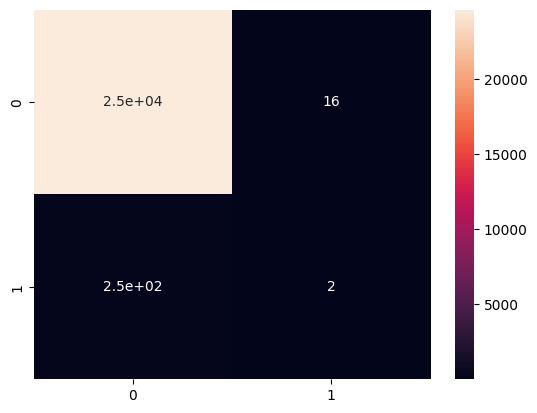

In [27]:
sns.heatmap(confusion_matrix(gtahmin,y_test),annot=True);

In [1]:
#!pip install imbalanced-learn

In [29]:
from imblearn.over_sampling import SMOTE
from collections import Counter
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

y_resampled = oversample.fit_resample(x, y)
labels = Counter(y)
print("y labels after oversampling")
print(labels)


y labels after oversampling
Counter({0: 124388, 1: 124388})


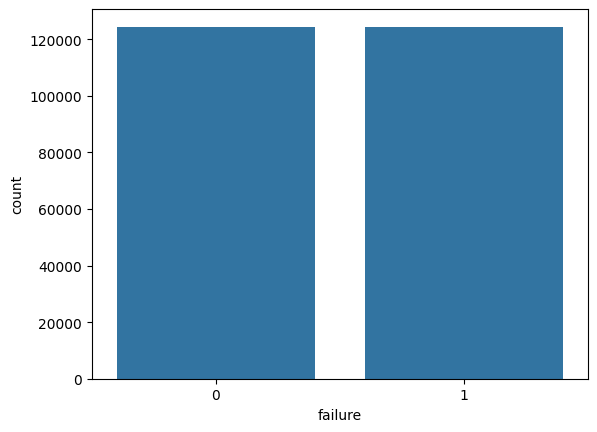

In [30]:
sns.countplot(x=y);

**Algo Modelling**

In [31]:
#!pip install xgboost imbalanced-learn (iki paket bir arada indirebiliriz)

In [34]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier  # Requires xgboost installation
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

def classification_funct(x, y):
    # Define classifiers
    g = GaussianNB()
    b = BernoulliNB()
    svc = SVC()
    KN = KNeighborsClassifier()
    D = DecisionTreeClassifier()
    R = RandomForestClassifier()
    Log = LogisticRegression()
    XGB = XGBClassifier()
    G = GradientBoostingClassifier()

    # Split the dataset into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)

    # Initialize classifiers list and their names
    algos = [g, b, svc, KN,  D, R, Log, XGB, G,]
    algo_names = ['GaussianNB', 'BernoulliNB','SVC', 'KNeighborsClassifier',
                  'DecisionTreeClassifier', 'RandomForestClassifier',
                  'LogisticRegression', 'XGBClassifier', 'GradientBoostingClassifier']

    # Initialize lists to store model performance metrics
    accuracy_scored = []
    precision_scored = []
    recall_scored = []
    f1_scored = []

    # Apply random under-sampling to balance the classes
    RUS = RandomUnderSampler(random_state=42)
    x_RUS, y_RUS = RUS.fit_resample(x_train, y_train)

    # Train and evaluate each model
    for model in algos:
        # Fit the model on the resampled training data
        model.fit(x_RUS, y_RUS)

        # Predict on the test set
        predict = model.predict(x_test)

        # Append the performance metrics to the respective lists
        accuracy_scored.append(accuracy_score(y_test, predict))
        precision_scored.append(precision_score(y_test, predict, average='macro'))
        recall_scored.append(recall_score(y_test, predict, average='macro'))
        f1_scored.append(f1_score(y_test, predict, average='macro'))

    # Create a result DataFrame to store the scores
    result = pd.DataFrame({
        'accuracy_score': accuracy_scored,
        'f1_score': f1_scored,
        'recall_score': recall_scored,
        'precision_score': precision_scored
    }, index=algo_names)

    # Sort the results by accuracy score in descending order
    return result.sort_values('accuracy_score', ascending=False)

In [35]:
classification_funct(x,y)

,accuracy_score,f1_score,recall_score,precision_score
RandomForestClassifier,0.999582,0.999582,0.999582,0.999582
XGBClassifier,0.999003,0.999003,0.999002,0.999004
DecisionTreeClassifier,0.998473,0.998472,0.998470,0.998475
KNeighborsClassifier,0.994067,0.994066,0.994043,0.994139
GradientBoostingClassifier,0.971058,0.971056,0.971040,0.971100
SVC,0.910924,0.910717,0.911172,0.915395
LogisticRegression,0.830353,0.827184,0.831012,0.858211
BernoulliNB,0.762405,0.752597,0.763363,0.814402
GaussianNB,0.704570,0.679451,0.705909,0.802249


In [ ]:
# Modeller ~ %99 ile basarili sonuc verdi. Algo Test SMOTE() uygulamadan sonra RFC ile 99% basari gösterdi.